# Modeling of Peartree Roundabout Traffic Using WX Data

In [2]:
# change directory to parent folder to access all folders
import os
path = os.path.dirname(os.getcwd())
os.chdir(path)
from data_preprocessing.classes.load_traffic_data import Import_Traffic_Data

In [3]:
import networkx as nx
import pandas as pd
import numpy as np
import ast
import math
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dropout, Dense,concatenate,Reshape,BatchNormalization
from stellargraph import StellarGraph, StellarDiGraph
import stellargraph as sg
from datetime import datetime
from stellargraph.layer import GCN_LSTM
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import seaborn as sns
from classes import model_performance,preprocessing
import pickle
import keras

## Load Traffic Data

In [4]:
# Peartree roundabout bbox and datetimes of interest
top=51.798433
bottom=51.791451
right=-1.281979
left=-1.289524
datetime_start=datetime(2021,6,23,0,0)
datetime_end=datetime(2021,7,13,10,50)

# load in traffic data
traffic_data,time = Import_Traffic_Data(top,bottom,right,left).load_traffic_data(datetime_start,datetime_end)

The number of road segments within the area of interest is:  70
202106230000
202106230005
202106230010
202106230015
202106230020
202106230025
202106230030
202106230035
202106230040
202106230045
202106230050
202106230055
202106230100
202106230105
202106230110
202106230115
202106230120
202106230125
202106230130
202106230135
202106230140
202106230145
202106230150
202106230155
202106230200
202106230205
202106230210
202106230215
202106230220
202106230225
202106230230
202106230235
202106230240
202106230245
202106230250
202106230255
202106230300
202106230305
202106230310
202106230315
202106230320
202106230325
202106230330
202106230335
202106230340
202106230345
202106230350
202106230355
202106230400
202106230405
202106230410
202106230415
202106230420
202106230425
202106230430
202106230435
202106230440
202106230445
202106230450
202106230455
202106230500
202106230505
202106230510
202106230515
202106230520
202106230525
202106230530
202106230535
202106230540
202106230545
202106230550
202106230555


202106250410
202106250415
202106250420
202106250425
202106250430
202106250435
202106250440
202106250445
202106250450
202106250455
202106250500
202106250505
202106250510
202106250515
202106250520
202106250525
202106250530
202106250535
202106250540
202106250545
202106250550
202106250555
202106250600
202106250605
202106250610
202106250615
202106250620
202106250625
202106250630
202106250635
202106250640
202106250645
202106250650
202106250655
202106250700
202106250705
202106250710
202106250715
202106250720
202106250725
202106250730
202106250735
202106250740
202106250745
202106250750
202106250755
202106250800
202106250805
202106250810
202106250815
202106250820
202106250825
202106250830
202106250835
202106250840
202106250845
202106250850
202106250855
202106250900
202106250905
202106250910
202106250915
202106250920
202106250925
202106250930
202106250935
202106250940
202106250945
202106250950
202106250955
202106251000
202106251005
202106251010
202106251015
202106251020
202106251025
202106251030

202106270950
202106270955
202106271000
202106271005
202106271010
202106271015
202106271020
202106271025
202106271030
202106271035
202106271040
202106271045
202106271050
202106271055
202106271100
202106271105
202106271110
202106271115
202106271120
202106271125
202106271130
202106271135
202106271140
202106271145
202106271150
202106271155
202106271200
202106271205
202106271210
202106271215
202106271220
202106271225
202106271230
202106271235
202106271240
202106271245
202106271250
202106271255
202106271300
202106271305
202106271310
202106271315
202106271320
202106271325
202106271330
202106271335
202106271340
202106271345
202106271350
202106271355
202106271400
202106271405
202106271410
202106271415
202106271420
202106271425
202106271430
202106271435
202106271440
202106271445
202106271450
202106271455
202106271500
202106271505
202106271510
202106271515
202106271520
202106271525
202106271530
202106271535
202106271540
202106271545
202106271550
202106271555
202106271600
202106271605
202106271610

202106291640
202106291645
202106291650
202106291655
202106291700
202106291705
202106291710
202106291715
202106291720
202106291725
202106291730
202106291735
202106291740
202106291745
202106291750
202106291755
202106291800
202106291805
202106291810
202106291815
202106291820
202106291825
202106291830
202106291835
202106291840
202106291845
202106291850
202106291855
202106291900
202106291905
202106291910
202106291915
202106291920
202106291925
202106291930
202106291935
202106291940
202106291945
202106291950
202106291955
202106292000
202106292005
202106292010
202106292015
202106292020
202106292025
202106292030
202106292035
202106292040
202106292045
202106292050
202106292055
202106292100
202106292105
202106292110
202106292115
202106292120
202106292125
202106292130
202106292135
202106292140
202106292145
202106292150
202106292155
202106292200
202106292205
202106292210
202106292215
202106292220
202106292225
202106292230
202106292235
202106292240
202106292245
202106292250
202106292255
202106292300

202107012245
202107012250
202107012255
202107012300
202107012305
202107012310
202107012315
202107012320
202107012325
202107012330
202107012335
202107012340
202107012345
202107012350
202107012355
202107020000
202107020005
202107020010
202107020015
202107020020
202107020025
202107020030
202107020035
202107020040
202107020045
202107020050
202107020055
202107020100
202107020105
202107020110
202107020115
202107020120
202107020125
202107020130
202107020135
202107020140
202107020145
202107020150
202107020155
202107020200
202107020205
202107020210
202107020215
202107020220
202107020225
202107020230
202107020235
202107020240
202107020245
202107020250
202107020255
202107020300
202107020305
202107020310
202107020315
202107020320
202107020325
202107020330
202107020335
202107020340
202107020345
202107020350
202107020355
202107020400
202107020405
202107020410
202107020415
202107020420
202107020425
202107020430
202107020435
202107020440
202107020445
202107020450
202107020455
202107020500
202107020505

202107040510
202107040515
202107040520
202107040525
202107040530
202107040535
202107040540
202107040545
202107040550
202107040555
202107040600
202107040605
202107040610
202107040615
202107040620
202107040625
202107040630
202107040635
202107040640
202107040645
202107040650
202107040655
202107040700
202107040705
202107040710
202107040715
202107040720
202107040725
202107040730
202107040735
202107040740
202107040745
202107040750
202107040755
202107040800
202107040805
202107040810
202107040815
202107040820
202107040825
202107040830
202107040835
202107040840
202107040845
202107040850
202107040855
202107040900
202107040905
202107040910
202107040915
202107040920
202107040925
202107040930
202107040935
202107040940
202107040945
202107040950
202107040955
202107041000
202107041005
202107041010
202107041015
202107041020
202107041025
202107041030
202107041035
202107041040
202107041045
202107041050
202107041055
202107041100
202107041105
202107041110
202107041115
202107041120
202107041125
202107041130

202107060950
202107060955
202107061000
202107061005
202107061010
202107061015
202107061020
202107061025
202107061030
202107061035
202107061040
202107061045
202107061050
202107061055
202107061100
202107061105
202107061110
202107061115
202107061120
202107061125
202107061130
202107061135
202107061140
202107061145
202107061150
202107061155
202107061200
202107061205
202107061210
202107061215
202107061220
202107061225
202107061230
202107061235
202107061240
202107061245
202107061250
202107061255
202107061300
202107061305
202107061310
202107061315
202107061320
202107061325
202107061330
202107061335
202107061340
202107061345
202107061350
202107061355
202107061400
202107061405
202107061410
202107061415
202107061420
202107061425
202107061430
202107061435
202107061440
202107061445
202107061450
202107061455
202107061500
202107061505
202107061510
202107061515
202107061520
202107061525
202107061530
202107061535
202107061540
202107061545
202107061550
202107061555
202107061600
202107061605
202107061610

202107081710
202107081715
202107081720
202107081725
202107081730
202107081735
202107081740
202107081745
202107081750
202107081755
202107081800
202107081805
202107081810
202107081815
202107081820
202107081825
202107081830
202107081835
202107081840
202107081845
202107081850
202107081855
202107081900
202107081905
202107081910
202107081915
202107081920
202107081925
202107081930
202107081935
202107081940
202107081945
202107081950
202107081955
202107082000
202107082005
202107082010
202107082015
202107082020
202107082025
202107082030
202107082035
202107082040
202107082045
202107082050
202107082055
202107082100
202107082105
202107082110
202107082115
202107082120
202107082125
202107082130
202107082135
202107082140
202107082145
202107082150
202107082155
202107082200
202107082205
202107082210
202107082215
202107082220
202107082225
202107082230
202107082235
202107082240
202107082245
202107082250
202107082255
202107082300
202107082305
202107082310
202107082315
202107082320
202107082325
202107082330

202107110040
202107110045
202107110050
202107110055
202107110100
202107110105
202107110110
202107110115
202107110120
202107110125
202107110130
202107110135
202107110140
202107110145
202107110150
202107110155
202107110200
202107110205
202107110210
202107110215
202107110220
202107110225
202107110230
202107110235
202107110240
202107110245
202107110250
202107110255
202107110300
202107110305
202107110310
202107110315
202107110320
202107110325
202107110330
202107110335
202107110340
202107110345
202107110350
202107110355
202107110400
202107110405
202107110410
202107110415
202107110420
202107110425
202107110430
202107110435
202107110440
202107110445
202107110450
202107110455
202107110500
202107110505
202107110510
202107110515
202107110520
202107110525
202107110530
202107110535
202107110540
202107110545
202107110550
202107110555
202107110600
202107110605
202107110610
202107110615
202107110620
202107110625
202107110630
202107110635
202107110640
202107110645
202107110650
202107110655
202107110700

202107130800
202107130805
202107130810
202107130815
202107130820
202107130825
202107130830
202107130835
202107130840
202107130845
202107130850
202107130855
202107130900
202107130905
202107130910
202107130915
202107130920
202107130925
202107130930
202107130935
202107130940
202107130945
202107130950
202107130955
202107131000
202107131005
202107131010
202107131015
202107131020
202107131025
202107131030
202107131035
202107131040
202107131045
202107131050


In [5]:
# speed capped by speed limit
sp = traffic_data[:,:,5]

# coordinates
lons = traffic_data[0,:,4]
lats = traffic_data[0,:,3]

## Load WX data

In [6]:
# load in 5min wx data from csv
wx_df = pd.read_csv("data_collection/data/wx_data/oxfordcity_wx_variables_5min_intervals.csv")

# collect variables of significance
wx_vars = wx_df[['precipitationIntensity','temperature','humidity','weatherCode']]

wx_vars_scaled = np.zeros_like(wx_vars)

# normalize between 0 and 1
for i in range(4):
    norm = (wx_vars.iloc[:,i] - wx_vars.iloc[:,i].min())/(wx_vars.iloc[:,i].max() - wx_vars.iloc[:,i].min())
    wx_vars_scaled[:,i] = norm
    #print(wx_vars_scaled[i].max())
    
    
# transpose data to be in proper format for preprocessing   
wx_vars_scaled = wx_vars_scaled.T



## Create Road-Network Graph

In [7]:
# load in csv of node connections
connections = pd.read_csv(f"{path}/data_preprocessing/peartree_roundabout.csv")

# convert feeding roads to integers
for i in range(len(connections)):
#for i in range(4):
    try:
        connections.feeding_roads.iloc[i] = ast.literal_eval(connections.feeding_roads.iloc[i])
    except ValueError:
        connections.feeding_roads.iloc[i] = np.nan

# node connections
nodes = connections["Unnamed: 0"]
roads = connections.feeding_roads

# replace nans with 0's
connections.feeding_roads = connections.feeding_roads.fillna(0)

# loop thru and establish edges
edge_list = []
for row in range(len(roads)):
    node1 = connections["Unnamed: 0"].iloc[row]
    node2 = connections.feeding_roads.iloc[row]
    try:
        for i in range(len(node2)):
            edge_list.append([node2[i], node1])
        #node2 = connections.feeding_roads.iloc[row]
    except TypeError:
        edge_list.append([node2, node1])
        
# remove 0's
edges = []
for edge in edge_list:
    if edge[0]==0:
        pass
    else:
        edges.append(edge)      

/Users/lucadicarlo/miniconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


##### Build the Graph

In [8]:
G = nx.Graph()
for i in range(len(nodes)):
    G.add_node(nodes[i],spd=sp[:,i],wx=wx_vars_scaled[:,0].T)
G.add_edges_from(edges)

# get adjacency matrix 
A = nx.to_numpy_array(G)

# convert graph to stellargraph object for modeling
square = StellarGraph.from_networkx(G,node_features="spd")

# get feature matrix
X = square.node_features()

# Modeling: GCN_LSTM_WX

###### Train/Test Split

In [9]:
# specify the training rate
train_rate = 0.8

# replace missing values with nans
X = np.where(X<0,0,X)

# split train/test
train_data, test_data = preprocessing.train_test_split(X, train_rate)
wx_train_data, wx_test_data = preprocessing.train_test_split(wx_vars_scaled, train_rate)

print("Train data: ", train_data.shape)
print("Test data: ", test_data.shape)
print("WX Train data: ", wx_train_data.shape)
print("WX Test data: ", wx_test_data.shape)

Train data:  (70, 4712)
Test data:  (70, 1179)
WX Train data:  (4, 4712)
WX Test data:  (4, 1179)


###### Scale Traffic Data

In [10]:
# scale data based on max/min
train_scaled, test_scaled = preprocessing.scale_data(train_data, test_data)

##### Set weather parameters for each node of road network

In [11]:
# create new train/test variables for wx variables
wx_train_data_ = []
wx_test_data_ = []

# loop thru and assign the wx data to each node
for i in range(70):
    wx_train_data_.append(wx_train_data.T)
    wx_test_data_.append(wx_test_data.T)

# convert data to correct shape
wx_train_data_ = np.array(wx_train_data_)
wx_test_data_ = np.array(wx_test_data_)

# Model Training

## 5-min sequence length

###### Pre-process data based on sequence and prediction length

In [12]:
# the number of timesteps up to the prediction that we will feed to the model (5-minute intervals)
seq_len = 12

# the amount of time in advance we want to predict (5-minute intervals)
pre_len = 1

# preprocess traffic data
traffic_trainX, trainY, traffic_testX, testY = preprocessing.sequence_data_preparation(
    seq_len, pre_len, train_scaled, test_scaled
)

# preprocessing weather data
wx_trainX, wx_trainY, wx_testX, wx_testY = preprocessing.sequence_data_preparation(
    seq_len, pre_len, wx_train_data_, wx_test_data_
)

print(traffic_trainX.shape)
print(trainY.shape)
print(traffic_testX.shape)
print(testY.shape)
print(wx_trainX.shape)
print(wx_trainY.shape)
print(wx_testX.shape)
print(wx_testY.shape)

(4700, 70, 12)
(4700, 70)
(1167, 70, 12)
(1167, 70)
(4700, 70, 12, 4)
(4700, 70, 4)
(1167, 70, 12, 4)
(1167, 70, 4)


##### Combine the weather variables w/ traffic matrix to create feature matrix

In [13]:
trainX = np.empty((len(wx_trainX[:,0,0,0]),len(wx_trainX[0,:,0,0]),len(wx_trainX[0,0,:,0]),5) )
testX = np.empty((len(wx_testX[:,0,0,0]),len(wx_testX[0,:,0,0]),len(wx_testX[0,0,:,0]),5) )

trainX[:,:,:,0] = traffic_trainX
trainX[:,:,:,1:5] = wx_trainX
testX[:,:,:,0] = traffic_testX
testX[:,:,:,1:5] = wx_testX

## Define Model Architecture

In [20]:
gcn_lstm = GCN_LSTM(
    seq_len=seq_len,
    adj=A,
    gc_layer_sizes=[10],
    gc_activations=["linear"],
    lstm_layer_sizes=[200,200,100],
    lstm_activations=["linear","relu","relu"],
    dropout=0.1
)

<ipython-input-20-34ff65e68dc6>:1: ExperimentalWarning: GCN_LSTM is experimental: Lack of unit tests and code refinement (see: https://github.com/stellargraph/stellargraph/issues/1132, https://github.com/stellargraph/stellargraph/issues/1526, https://github.com/stellargraph/stellargraph/issues/1564). It may be difficult to use and may have major changes at any time.
  gcn_lstm = GCN_LSTM(


In [21]:
# build data fusion layer which will merge wx/traffic feature matrix (length 5) into one array to be fed into the t-gcn model
input_layer = Input(shape=(70,12,5))
layer1 = Dense(1, activation='linear')(input_layer)
layer2 = BatchNormalization()(layer1)
layer3 = Dropout(0.1)(layer1)
output_layer = Reshape((70,12))(layer3)
data_fusion_model = Model(input_layer,output_layer)

# recall tgcn model
x_input, x_output = gcn_lstm.in_out_tensors()
tgcn_model = Model(inputs=x_input, outputs=x_output)


# of data fusion model feeds into t-gcn
output = tgcn_model(data_fusion_model.output)

# define entire model 
tgcn_wx_model = Model(data_fusion_model.input,output, name="T-GCN-WX")
tgcn_wx_model.summary()

# compile model
optimizer = keras.optimizers.Adam(lr=0.001)
tgcn_wx_model.compile(optimizer=optimizer, loss="mse", metrics=["mse"])


Model: "T-GCN-WX"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 70, 12, 5)]       0         
_________________________________________________________________
dense_5 (Dense)              (None, 70, 12, 1)         6         
_________________________________________________________________
dropout_4 (Dropout)          (None, 70, 12, 1)         0         
_________________________________________________________________
reshape_8 (Reshape)          (None, 70, 12)            0         
_________________________________________________________________
model_5 (Functional)         (None, 70)                670160    
Total params: 670,166
Trainable params: 665,266
Non-trainable params: 4,900
_________________________________________________________________


In [22]:
history = tgcn_wx_model.fit(
    x=trainX,
    y=trainY,
    epochs=100,
    batch_size=64,
    shuffle=True,
    verbose=1,
    validation_data=(testX,testY)
)

Epoch 1/100
74/74 [==============================] - 7s 69ms/step - loss: 0.0229 - mse: 0.0229 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2/100
74/74 [==============================] - 5s 65ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 3/100
74/74 [==============================] - 5s 65ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 4/100
74/74 [==============================] - 5s 65ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 5/100
74/74 [==============================] - 5s 65ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 6/100
74/74 [==============================] - 5s 65ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 7/100
74/74 [==============================] - 5s 65ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 8/100
74/74 [==============================] - 5s 65ms/step - loss: 0.

74/74 [==============================] - 5s 64ms/step - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 63/100
74/74 [==============================] - 5s 64ms/step - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 64/100
74/74 [==============================] - 5s 65ms/step - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 65/100
74/74 [==============================] - 5s 65ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 66/100
74/74 [==============================] - 5s 65ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 67/100
74/74 [==============================] - 5s 64ms/step - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 68/100
74/74 [==============================] - 5s 65ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 69/100
74/74 [==============================] - 5s 65ms/step - loss: 0.0025 

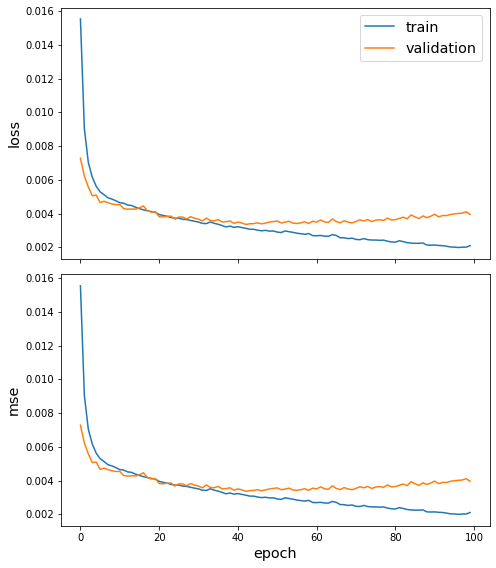

In [23]:
sg.utils.plot_history(history)

## Save Model Weights (T-GCN-WX: 5-min prediction)

In [ ]:
# save model to folder
tgcn_wx_model.save('modeling/models/tgcn_wx-5min')

## 15-min sequence length

In [ ]:
# the number of timesteps up to the prediction that we will feed to the model (5-minute intervals)
seq_len = 12

# the amount of time in advance we want to predict (5-minute intervals)
pre_len = 3

# preprocess traffic data
traffic_trainX, trainY, traffic_testX, testY = preprocessing.sequence_data_preparation(
    seq_len, pre_len, train_scaled, test_scaled
)

# preprocessing weather data
wx_trainX, wx_trainY, wx_testX, wx_testY = preprocessing.sequence_data_preparation(
    seq_len, pre_len, wx_train_data_, wx_test_data_
)

trainX = np.empty((len(wx_trainX[:,0,0,0]),len(wx_trainX[0,:,0,0]),len(wx_trainX[0,0,:,0]),5) )
testX = np.empty((len(wx_testX[:,0,0,0]),len(wx_testX[0,:,0,0]),len(wx_testX[0,0,:,0]),5) )

trainX[:,:,:,0] = traffic_trainX
trainX[:,:,:,1:5] = wx_trainX
testX[:,:,:,0] = traffic_testX
testX[:,:,:,1:5] = wx_testX

gcn_lstm = GCN_LSTM(
    seq_len=seq_len,
    adj=A,
    gc_layer_sizes=[10],
    gc_activations=["linear"],
    lstm_layer_sizes=[100],
    lstm_activations=["linear"],
    dropout=0.1
)

# build data fusion layer which will merge wx/traffic feature matrix (length 5) into one array to be fed into the t-gcn model
input_layer = Input(shape=(70,12,5))
layer1 = Dense(1, activation='linear')(input_layer)
layer2 = BatchNormalization()(layer1)
layer3 = Dropout(0.1)(layer1)
output_layer = Reshape((70,12))(layer3)
data_fusion_model = Model(input_layer,output_layer)

# recall tgcn model
x_input, x_output = gcn_lstm.in_out_tensors()
tgcn_model = Model(inputs=x_input, outputs=x_output)


# of data fusion model feeds into t-gcn
output = tgcn_model(data_fusion_model.output)

# define entire model 
tgcn_wx_model_15 = Model(data_fusion_model.input,output, name="T-GCN-WX")
tgcn_wx_model_15.summary()

# compile model
optimizer = keras.optimizers.Adam(lr=0.001)
tgcn_wx_model_15.compile(optimizer=optimizer, loss="mse", metrics=["mse"])

history_15 = tgcn_wx_model_15.fit(
    x=trainX,
    y=trainY,
    epochs=80,
    batch_size=64,
    shuffle=True,
    verbose=1,
    validation_data=(testX,testY)
)

In [ ]:
sg.utils.plot_history(history_15)

## Save Model Weights (T-GCN-WX: 15-min prediction)

In [ ]:
# save model to folder
tgcn_wx_model_15.save('modeling/models/tgcn_wx-15min')

## 30-min sequence length

In [ ]:
# the number of timesteps up to the prediction that we will feed to the model (5-minute intervals)
seq_len = 12

# the amount of time in advance we want to predict (5-minute intervals)
pre_len = 6

# preprocess traffic data
traffic_trainX, trainY, traffic_testX, testY = preprocessing.sequence_data_preparation(
    seq_len, pre_len, train_scaled, test_scaled
)

# preprocessing weather data
wx_trainX, wx_trainY, wx_testX, wx_testY = preprocessing.sequence_data_preparation(
    seq_len, pre_len, wx_train_data_, wx_test_data_
)

trainX = np.empty((len(wx_trainX[:,0,0,0]),len(wx_trainX[0,:,0,0]),len(wx_trainX[0,0,:,0]),5) )
testX = np.empty((len(wx_testX[:,0,0,0]),len(wx_testX[0,:,0,0]),len(wx_testX[0,0,:,0]),5) )

trainX[:,:,:,0] = traffic_trainX
trainX[:,:,:,1:5] = wx_trainX
testX[:,:,:,0] = traffic_testX
testX[:,:,:,1:5] = wx_testX

gcn_lstm = GCN_LSTM(
    seq_len=seq_len,
    adj=A,
    gc_layer_sizes=[15],
    gc_activations=["linear"],
    lstm_layer_sizes=[100],
    lstm_activations=["relu"],
    dropout=0.1
)

# build data fusion layer which will merge wx/traffic feature matrix (length 5) into one array to be fed into the t-gcn model
input_layer = Input(shape=(70,12,5))
layer1 = Dense(1, activation='linear')(input_layer)
layer2 = BatchNormalization()(layer1)
layer3 = Dropout(0.5)(layer1)
output_layer = Reshape((70,12))(layer3)
data_fusion_model = Model(input_layer,output_layer)

# recall tgcn model
x_input, x_output = gcn_lstm.in_out_tensors()
tgcn_model = Model(inputs=x_input, outputs=x_output)


# of data fusion model feeds into t-gcn
output = tgcn_model(data_fusion_model.output)

# define entire model 
tgcn_wx_model_30 = Model(data_fusion_model.input,output, name="T-GCN-WX")
tgcn_wx_model_30.summary()

# compile model
optimizer = keras.optimizers.Adam(lr=0.001)
tgcn_wx_model_30.compile(optimizer=optimizer, loss="mse", metrics=["mse"])

history_30 = tgcn_wx_model_30.fit(
    x=trainX,
    y=trainY,
    epochs=80,
    batch_size=64,
    shuffle=True,
    verbose=1,
    validation_data=(testX,testY)
)

In [ ]:
sg.utils.plot_history(history_30)

## Save Model Weights (T-GCN-WX: 30-min prediction)

In [ ]:
# save model to folder
tgcn_wx_model_30.save('modeling/models/tgcn_wx-30min')

## 60-min sequence length

In [ ]:
# the number of timesteps up to the prediction that we will feed to the model (5-minute intervals)
seq_len = 12

# the amount of time in advance we want to predict (5-minute intervals)
pre_len = 12

# preprocess traffic data
traffic_trainX, trainY, traffic_testX, testY = preprocessing.sequence_data_preparation(
    seq_len, pre_len, train_scaled, test_scaled
)

# preprocessing weather data
wx_trainX, wx_trainY, wx_testX, wx_testY = preprocessing.sequence_data_preparation(
    seq_len, pre_len, wx_train_data_, wx_test_data_
)

trainX = np.empty((len(wx_trainX[:,0,0,0]),len(wx_trainX[0,:,0,0]),len(wx_trainX[0,0,:,0]),5) )
testX = np.empty((len(wx_testX[:,0,0,0]),len(wx_testX[0,:,0,0]),len(wx_testX[0,0,:,0]),5) )

trainX[:,:,:,0] = traffic_trainX
trainX[:,:,:,1:5] = wx_trainX
testX[:,:,:,0] = traffic_testX
testX[:,:,:,1:5] = wx_testX

gcn_lstm = GCN_LSTM(
    seq_len=seq_len,
    adj=A,
    gc_layer_sizes=[15],
    gc_activations=["linear"],
    lstm_layer_sizes=[100],
    lstm_activations=["relu"],
    dropout=0.1
)

# build data fusion layer which will merge wx/traffic feature matrix (length 5) into one array to be fed into the t-gcn model
input_layer = Input(shape=(70,12,5))
layer1 = Dense(1, activation='linear')(input_layer)
layer2 = BatchNormalization()(layer1)
layer3 = Dropout(0.5)(layer1)
output_layer = Reshape((70,12))(layer3)
data_fusion_model = Model(input_layer,output_layer)

# recall tgcn model
x_input, x_output = gcn_lstm.in_out_tensors()
tgcn_model = Model(inputs=x_input, outputs=x_output)


# of data fusion model feeds into t-gcn
output = tgcn_model(data_fusion_model.output)

# define entire model 
tgcn_wx_model_60 = Model(data_fusion_model.input,output, name="T-GCN-WX")
tgcn_wx_model_60.summary()

# compile model
optimizer = keras.optimizers.Adam(lr=0.001)
tgcn_wx_model_60.compile(optimizer=optimizer, loss="mse", metrics=["mse"])

history_60 = tgcn_wx_model_60.fit(
    x=trainX,
    y=trainY,
    epochs=80,
    batch_size=64,
    shuffle=True,
    verbose=1,
    validation_data=(testX,testY)
)

In [ ]:
sg.utils.plot_history(history_60)

## Save Model Weights (T-GCN-WX: 60-min prediction)

In [ ]:
# save model to folder
tgcn_wx_model_60.save('modeling/models/tgcn_wx-60min')

In [ ]:
yhat = tgcn_wx_model_30.predict(testX)

## Rescale values
max_speed = train_data.max()
min_speed = train_data.min()

## actual train and test values
test_rescref = np.array(testY * max_speed)

## Rescale model predicted values
test_rescpred = np.array((yhat) * max_speed)

In [ ]:
model = model_performance.spatio_temporal_traffic_model()
model.fit(traffic_trainX,trainY,traffic_testX,testY)
model.plot_specific_road_speed_performance("Linear Regression",time=time,road_seg_num=20,window=12*12)

In [ ]:
model.plot_specific_road_speed_performance("GCN-LSTM",time=time, road_seg_num=20,predictions=yhat.T,true=testY,window=12*12)


In [ ]:
model.plot_mean_road_speed_performance("Linear Regression",time=time,window=None)

In [ ]:
model.plot_mean_road_speed_performance("GCN-LSTM",time=time,predictions=yhat.T,true=testY,window=None)